In [ ]:
# 1,2,3 글자가 써있는 이미지 (28*28)를 활용하여 분류
# 28*28 = 784 : 1 개당 컬럼 784개
# 총 784 * 3개의 변수

In [2]:
from torchvision.datasets.mnist import MNIST
from torch.utils.data.dataloader import DataLoader
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import torch.nn as nn 
import torch

In [3]:
train_data = MNIST(root='./data/',train=True,download=True,transform=ToTensor())
test_data = MNIST(root='./data/',train=False,download=True,transform=ToTensor())

100.0%
100.0%
100.0%
100.0%


In [7]:
train_data.data.size()
train_data.data.dim()

3

In [8]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [ ]:
train_data.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

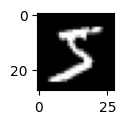

In [20]:
plt.figure(figsize=(1,1))
plt.imshow(train_data.data[0],cmap='gray')

In [ ]:
train_loader = DataLoader(train_data,batch_size=32,shuffle=True) # 데이터를 배치단위로 쪼개준다 , shuffle: 데이터를 섞는다,batch_size : 6만개의 데이터를 32개의 배치로 나눈다
test_loader = DataLoader(test_data,batch_size=32,shuffle=False) # 테스트 데이터를 랜덤하게 섞을 필요는 없다. 섞어도 상관은 없다.

In [22]:

next(iter(train_loader))[0].shape

torch.Size([32, 1, 28, 28])

In [39]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

In [23]:
model = nn.Sequential(
    nn.Linear(784,64),
    nn.ReLU(),
    nn.Linear(64,32),
    nn.ReLU(),
    nn.Linear(32,10)
)

model

Sequential(
  (0): Linear(in_features=784, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=10, bias=True)
)

In [40]:
model.to(device)

Sequential(
  (0): Linear(in_features=784, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=10, bias=True)
)

In [45]:
import torch.optim as optim # 최적화 함수
optim = optim.Adam(model.parameters(),lr = 1e-3)
criterion = nn.CrossEntropyLoss() # 분류모델인경우 손실 구할때 사용
epochs = 20

for epoch in range(epochs):
    for data,label in train_loader:
        optim.zero_grad() # 기울기 초기화
        data = torch.reshape(data,(-1,784)) # 2차원으로 열은 32개(배치1단위), 784열(이미지 한개 정보)
        data = data.to(device)

        pred = model(data) # 학습

        loss = criterion(pred,label.to(device)) # 손실

        loss.backward()
        optim.step()
    
    print(f'epoch({epoch}) : {loss}')



epoch(0) : 0.1121683269739151
epoch(1) : 0.2422279715538025
epoch(2) : 0.01894029602408409
epoch(3) : 0.07166304439306259
epoch(4) : 0.1695304811000824
epoch(5) : 0.008625715039670467
epoch(6) : 0.027300972491502762
epoch(7) : 0.016914984211325645
epoch(8) : 0.013606995344161987
epoch(9) : 0.0010499777272343636
epoch(10) : 0.0016924809897318482
epoch(11) : 0.0002986890613101423
epoch(12) : 0.0004792294930666685
epoch(13) : 0.0023000258952379227
epoch(14) : 0.005479259416460991
epoch(15) : 0.02778974361717701
epoch(16) : 0.020737819373607635
epoch(17) : 0.000439376977737993
epoch(18) : 0.0008704658830538392
epoch(19) : 0.0035243327729403973


In [65]:
# 모델의 평가
model.eval()

total = 0
correct = 0
with torch.no_grad():
    for data,label in test_loader:
        data = torch.reshape(data,(-1,784))
        data = data.to(device)
        pred = model(data)

        label = label.to(device)

        # 예측된 정답값

        _,predresult = torch.max(pred,1) #values,index 중 index만 필요

        print(predresult)
        print(label)

        (predresult == label).sum()

        print("-"*30,label.size(0))

        correct += (predresult == label).sum().item()
        total += label.size(0)

tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1], device='cuda:0')
tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1], device='cuda:0')
------------------------------ 32
tensor([3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0,
        4, 1, 9, 5, 7, 8, 9, 3], device='cuda:0')
tensor([3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0,
        4, 1, 9, 5, 7, 8, 9, 3], device='cuda:0')
------------------------------ 32
tensor([7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
        6, 1, 3, 6, 9, 3, 1, 4], device='cuda:0')
tensor([7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
        6, 1, 3, 6, 9, 3, 1, 4], device='cuda:0')
------------------------------ 32
tensor([1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2,
        5, 4, 7, 6, 7, 9, 0, 5], devic

In [62]:
correct / total

0.9746

In [ ]:
predresult == label

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True], device='cuda:0')

In [63]:
(predresult == label).sum().item()

16

In [52]:
torch.max(torch.tensor([[1,2,3,4,5]]),1)

torch.return_types.max(
values=tensor([5]),
indices=tensor([4]))

In [30]:
class SchImg(nn.Module):
    def __init__(self):
        super(SchImg,self).__init__()
        self.fc1 = nn.Linear(784,64)
        self.fc1_act = nn.ReLU()
        self.fc2 = nn.Linear(64,32)
        self.fc2_act = nn.ReLU()
        self.fc3 = nn.Linear(32,10)

    def forward(self,x):
        x = self.fc1(x)
        x = self.fc1_act(x)
        x = self.fc2(x)
        x = self.fc2_act(x)
        x = self.fc3(x)
        
        return x
    

In [32]:
model1 = SchImg().to(device)

In [33]:
model1

SchImg(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc1_act): ReLU()
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc2_act): ReLU()
  (fc3): Linear(in_features=32, out_features=10, bias=True)
)

In [34]:
list(model1.parameters())

[Parameter containing:
 tensor([[ 0.0206, -0.0321, -0.0230,  ...,  0.0322, -0.0100, -0.0088],
         [ 0.0055, -0.0098, -0.0199,  ...,  0.0080,  0.0308, -0.0328],
         [ 0.0027, -0.0156, -0.0348,  ..., -0.0106, -0.0134,  0.0001],
         ...,
         [ 0.0150, -0.0293,  0.0322,  ..., -0.0296, -0.0022, -0.0218],
         [-0.0347,  0.0096,  0.0228,  ...,  0.0243,  0.0265, -0.0270],
         [-0.0089, -0.0056, -0.0252,  ...,  0.0026, -0.0135, -0.0085]],
        device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([-0.0241,  0.0345,  0.0038,  0.0258, -0.0332,  0.0213,  0.0236, -0.0302,
         -0.0332, -0.0292,  0.0213, -0.0292, -0.0316,  0.0240, -0.0084,  0.0123,
          0.0335,  0.0184, -0.0068, -0.0030, -0.0152, -0.0158,  0.0115, -0.0068,
         -0.0189, -0.0026,  0.0168, -0.0046,  0.0291, -0.0175, -0.0196, -0.0322,
          0.0092, -0.0282,  0.0075, -0.0227, -0.0289,  0.0008,  0.0345,  0.0354,
          0.0147, -0.0325, -0.0216, -0.0053,  0.0021,  0.0015,

In [ ]:
import torch.optim as Adam # 최적화 함수

criterion = nn.MSELoss()
optimizer = optim.Adam(model1.parameters(),lr=0.003)

model1.to(device)
loss_list = []
for idx,(data,target) in enumerate(train_loader):
    optimizer.zero_grad() # 가중치 초기화

    input_data = data.to(device).float()
    target_data = target.to(device).float()

    # 2. ★ 차원 변경 (Flatten) ★
    # (60000, 28, 28) -> (60000, 784)로 모양을 바꿉니다.
    # -1은 "남는 차원을 알아서 계산해라"라는 뜻입니다.
    input_data = input_data.view(input_data.size(0), -1)

    pred = model1(input_data) # 예측
    loss = criterion(pred,target_data) # 손실

    loss_list.append(loss)

    loss.backward() # 역전파 기울기 계산
    optimizer.setp() # 가중치,기울기 업데이트

c:\potenup3\prj_deep\.venv\Lib\site-packages\torch\nn\modules\loss.py:626: UserWarning: Using a target size (torch.Size([60000])) that is different to the input size (torch.Size([60000, 10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


RuntimeError: The size of tensor a (10) must match the size of tensor b (60000) at non-singleton dimension 1